<a href="https://colab.research.google.com/github/Mahnazshamissa/Python/blob/main/asigmoKatiaGroupE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

day 5 with Katia - basic python commmands


In [ ]:
import pandas as pd

In [ ]:
!pip install featuretools as ft

In [ ]:
es = ft.EntitySet(id = 'titanic_data')

es = es.entity_from_dataframe(entity_id = 'test', dataframe = combine.drop(['Survived'], axis=1), 
                              variable_types = 
                              {
                                  'Embarked': ft.variable_types.Categorical,
                                  'Sex': ft.variable_types.Boolean,
                              },
                              index = 'PassengerId')

es

NameError: ignored

In [ ]:
python -m pip install featuretools

SyntaxError: ignored

In [ ]:
titanic = pd.read_csv('/content/train.csv')
titanic.Fare.value_counts

FileNotFoundError: ignored

In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


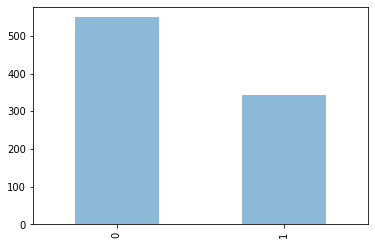

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
titanic.Survived.value_counts().plot(kind="bar",alpha=0.5)

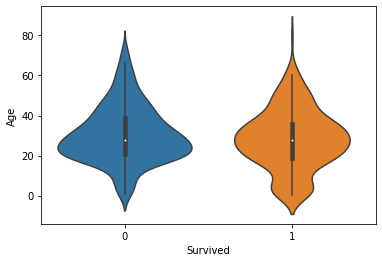

In [ ]:
#titanic.plot(kind='scatter',  x="Age", y="Survived")
sns.violinplot(y=titanic.Age, x=titanic.Survived)

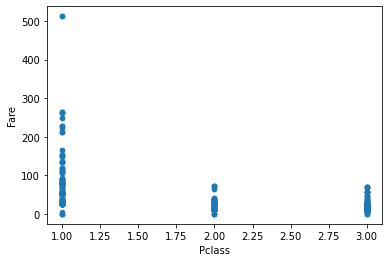

In [ ]:
titanic.plot(x="Pclass", y="Fare", kind="scatter");

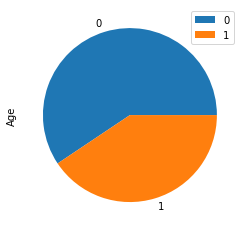

In [ ]:
df=titanic.groupby('Survived').count()
df.plot.pie(y='Age')


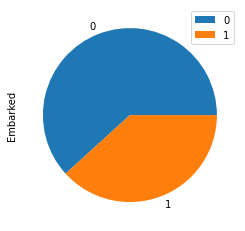

In [ ]:
df.plot.pie(y='Embarked')

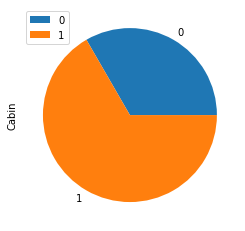

In [ ]:
df.plot.pie(y='Cabin')

In [ ]:
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


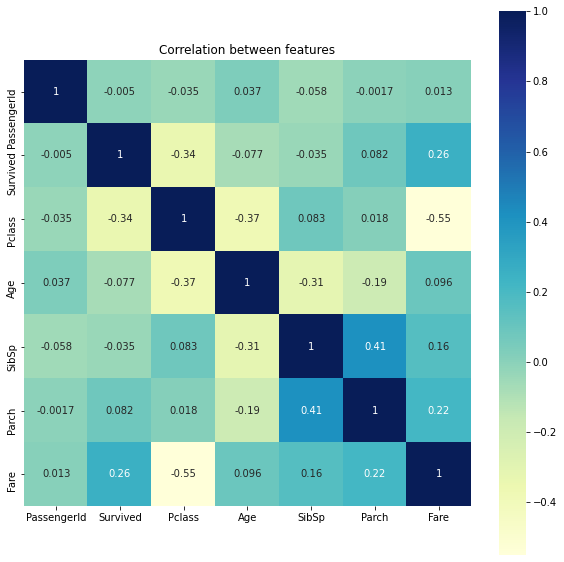

In [ ]:
corr=titanic.corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

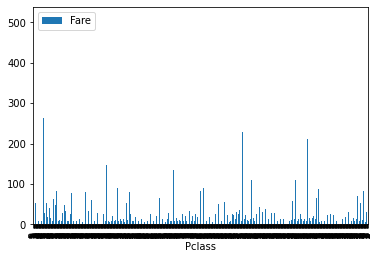

In [ ]:
titanic.plot(kind="bar", x='Pclass', y='Fare')

In [ ]:
cols = ['Name', 'Ticket', 'Cabin']
titanic = titanic.drop(cols, axis=1)

In [ ]:
 titanic.isnull().values.sum()
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [ ]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(titanic[col]))
    titanic_dummies = pd.concat(dummies, axis=1)

In [ ]:
    titanic_dummies
    titanic = pd.concat((titanic,titanic_dummies), axis=1)

In [ ]:
titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3,female,male,C,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,0,0,1,0,1,0,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,1,0,0,1,0,1,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,1,0,0,1,0,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S,0,1,0,0,1,0,0,1
887,888,1,1,female,19.0,0,0,30.0000,S,1,0,0,1,0,0,0,1
888,889,0,3,female,NaN,1,2,23.4500,S,0,0,1,1,0,0,0,1
889,890,1,1,male,26.0,0,0,30.0000,C,1,0,0,0,1,1,0,0


In [ ]:
titanic = titanic.drop(['Pclass', 'Sex', 'Embarked'], axis=1)

In [ ]:
titanic

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,1,2,3,female,male,C,Q,S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,1,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1,1,0,0


In [ ]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Age            0
SibSp          0
Parch          0
Fare           0
1              0
2              0
3              0
female         0
male           0
C              0
Q              0
S              0
dtype: int64

In [ ]:
titanic['Age'] = titanic['Age'].interpolate()


In [ ]:
titanic.isnull().sum()

NameError: ignored

In [ ]:
 titanic['Age'] > 120

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

# New section

In [ ]:
mask = titanic['Age'] > 25
titanic[mask].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [ ]:
titanic['relatives'] = titanic.SibSp+titanic.Parch
titanic['has_relative']=titanic['relatives']>0
titanic.has_relative
titanic.drop(['relatives','relatives1'], axis=1)

,PassengerId,Survived,Age,SibSp,Parch,Fare,1,2,3,female,male,C,Q,S,has_relative
0,1,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1,True
1,2,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0,True
2,3,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1,False
3,4,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1,True
4,5,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,27.0,0,0,13.0000,0,1,0,0,1,0,0,1,False
887,888,1,19.0,0,0,30.0000,1,0,0,1,0,0,0,1,False
888,889,0,22.5,1,2,23.4500,0,0,1,1,0,0,0,1,True
889,890,1,26.0,0,0,30.0000,1,0,0,0,1,1,0,0,False


In [ ]:
titanic['relatives'] = titanic.SibSp+titanic.Parch
titanic['has_relative']=titanic['Age']<1
titanic.has_relative
titanic.drop(['relatives','relatives1'], axis=1)

In [ ]:
import numpy as np
import pandas as pd
Rhyms = pd.DataFrame({np.NAN})


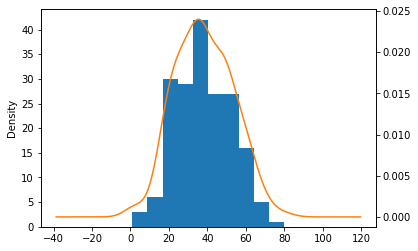

In [ ]:
ax_hist=titanic.Age[titanic.Pclass==1].plot(kind='hist')
titanic.Age[titanic.Pclass==1].plot(kind='kde',ax=ax_hist,secondary_y=True)

In [ ]:
fruits = ['bananas', 'mangoes', 'oranges', 'others'] 
quantities = [400, 300, 500, 200]

In [ ]:
import numpy as np

set exercise, from [pynative](https://pynative.com/python-set-exercise-with-solutions/)

In [ ]:
sampleSet = {"Yellow","Orange","Black"}
sampleList = ["Blue","Green","Red"]

In [ ]:
sampleSet.update(sampleList)
print(sampleSet)

{'Red', 'Yellow', 'Green', 'Black', 'Orange', 'Blue'}


question 2

In [ ]:
set1 = {10, 20, 30, 40, 50}
set2 = {30, 40, 50, 60, 70}

In [ ]:
setFinal = set1.intersection(set2)
print(setFinal)

{40, 50, 30}


question 3


In [ ]:
setCombined = set1.copy()
setCombined.update(set2)
print(setCombined)

{70, 40, 10, 50, 20, 60, 30}


In [ ]:
print(set1):2

{40, 10, 50, 20, 30}


question 4


In [ ]:
set1 = {10, 20, 30}
set2 = {20, 40, 50}

In [ ]:
set1.difference_update(set2)
print(set1)

{10, 30}


question 5

In [ ]:
set1 = {10, 20, 30, 40, 50}

In [ ]:
set1.difference_update({10,20,30})
print(set1)

{40, 50}


queiestion 6


In [ ]:
set1 = {10, 20, 30, 40, 50}
set2 = {30, 40, 50, 60, 70}

In [ ]:
set1.symmetric_difference(set2)
print(set1)

{40, 10, 50, 20, 30}


question 7



In [ ]:
set1 = {10, 20, 30, 40, 50}
set2 = {60, 70, 80, 90, 10}

In [ ]:
setIntersect = set1.intersection(set2)
if len(setIntersect) > 0: 
  print("sets have items in common")
  print(setIntersect)
else:
  print("no eleements in comoon")

sets have items in common
{10}


# Exercise 2: lists [pynative](https://pynative.com/python-list-exercise-with-solutions/)


question 1


In [ ]:
aList = [100,200,300,400,500]

In [ ]:
aList = aList[::-1]
print(aList)

[500, 400, 300, 200, 100]


print(aList.reverse())

In [ ]:
print(aList.reverse())

None


Exercise 3: maps


question 1


In [ ]:
keys = ['Ten', 'Twenty', 'Thirty']
values = [10, 20, 30]

In [ ]:
sampleDict = dict(zip(keys,values))
print(sampleDict)

{'Ten': 10, 'Twenty': 20, 'Thirty': 30}


In [ ]:
dict1 = {'Ten': 10, 'Twenty': 20, 'Thirty': 30}
dict2 = {'Thirty': 30, 'Fourty': 40, 'Fifty': 50}

In [ ]:
dict3 = dict1.copy()
dict3.update(dict2)
print(dict3)

{'Ten': 10, 'Twenty': 20, 'Thirty': 30, 'Fourty': 40, 'Fifty': 50}


question 3


In [ ]:
sampleDict = { 
   "class":{ 
      "student":{ 
         "name":"Mike",
         "marks":{ 
            "physics":70,
            "history":80
         }
      }
   }
}

In [ ]:
print(sampleDict["class"]["student"]["marks"]["history"])

80


question 4


In [ ]:
employees = ['Kelly', 'Emma', 'John']
defaults = {"designation": 'Application Developer', "salary": 8000}

In [ ]:
resDict = dict.fromkeys(employees, defaults)
print(resDict)
print(resDict["Kelly"])

{'Kelly': {'designation': 'Application Developer', 'salary': 8000}, 'Emma': {'designation': 'Application Developer', 'salary': 8000}, 'John': {'designation': 'Application Developer', 'salary': 8000}}
{'designation': 'Application Developer', 'salary': 8000}


In [ ]:
sampleDict = {
  "name": "Kelly",
  "age":25,
  "salary": 8000,
  "city": "New york"
}
keys = ["name","salary"]

In [ ]:
newDict = {k: sampleDict[k] for k in keys} # comprehensive dictionary
print(newDict)

{'name': 'Kelly', 'salary': 8000}


In [ ]:
def suitable(var):
  if var > 30:
    if var > 50:
      print("MAYBE")
    else:
      print("NO")
  else:
    print("YES")

In [ ]:
suitable(31)

NO


In [ ]:
def fun(var):
  if var >= 10:
    print(''Yes'')
  elif var >= 30:
      print(''No'')
  elif var>= 51:
    print(''MAYBE'')
  else:
    print("")


IndentationError: ignored

In [ ]:
import random 
list1=[0,1,2,3,4,5,6,7,8,9]
list2= random.shuffle(list1)
k=3
len1 = int(len(list1)/k)
rem= len(list1)%k
fall1=list1[:len1]
fa

indentation is the way Python knows it is still inside a block, it is not just aesthetic
:)


In [ ]:
list1 = [12,15,32,44,56]
[print(el) for el in list1]

12
15
32
44
56


[None, None, None, None, None]

In [ ]:
list1 = [12, 15, 32, 42, 55, 75, 122, 132, 150, 180, 200]

In [ ]:
def multiplesOfFive(varList):
  try:
    for el in varList:
      if el > 150:
        break
      if el % 5 == 0:
        print(el)
  except:
    print("something went wrong...")

In [ ]:
multiplesOfFive(list1)

15
55
75
150


**problem 2: k-fold cross-validation**

split datasets into k subgroups, and run one experiment for each of the subgroups, where the experiment test is the chosen subgroup, and the experiment training group is the other elements not included in the test subgroup.

*approach*

creat a list for the k subgroups. leap the original data with python slicing 
```
list[::leap]
```
once the list of subgroups, create a dictionary with each key is the experiment, value is a dictionary with "test" and "training" as keys, whose values are the subset of elements distributed
 

In [ ]:
allData = [0,1,2,3,4,5,6,7,8,9]
k = 3

In [ ]:
def kfoldDistro(allData,k):
  foldList = []
  for i in range(0,k):
    foldList.append(allData[i::k])
  print("folds list: ",foldList,"\n")
  experiments = {}
  for i in range(0,k):
    training = foldList.copy()
    training.pop(i)
    trainingFlat = []
    [[trainingFlat.append(elem) for elem in el] for el in training]
    group = {'test':foldList[i],'training':trainingFlat}
    experiments[i] = group
  return experiments

dd = kfoldDistro(allData,k)
for el in dd.keys():
  print("experiment ",el," --> test: ",dd[el]["test"],"  training: ",dd[el]["training"])

folds list:  [[0, 3, 6, 9], [1, 4, 7], [2, 5, 8]] 

experiment  0  --> test:  [0, 3, 6, 9]   training:  [1, 4, 7, 2, 5, 8]
experiment  1  --> test:  [1, 4, 7]   training:  [0, 3, 6, 9, 2, 5, 8]
experiment  2  --> test:  [2, 5, 8]   training:  [0, 3, 6, 9, 1, 4, 7]


DAY 11
A+0=A, A.A=A,A+1=1,A.\BAR(A)=0

In [ ]:
a=True
b=False
c=1
d=0
f=a+bool(d)
f==a

True

In [ ]:
a=True
b=False
c=1
d=0
f=a*a
f==a

True

In [ ]:
a=True
b=False
c=1
d=0
f=bool(a+bool(c))
f==a
f

True

In [ ]:
a=True
b=False
c=1
d=0
f=bool(a+bool(a*b))
f==a

True

In [ ]:
columns = ['Mo', 'Tue', 'Wed', 'Thur', 'Fri'] # width of the array - different days of the week 
rows = ['Vienna', 'Bogota', 'Stockholm', 'Kampala'] # height of the array - different cities 
weather = [ [9, 7, 10, 12, 11], # Vienna weather
           [19, 17, 20, 19, 19], # Bogota weather 
           [9, 10, 9, 8, 8], # Stockholm weather 
           [23, 24, 21, 23, 22] # Kampala weather  
           ]
weather[2][1:3]
rows.index('Sto')

[10, 9]

In [ ]:
columns = ['Mo', 'Tue', 'Wed', 'Thur', 'Fri'] # width of the array - different days of the week 
rows = ['Vienna', 'Bogota', 'Stockholm', 'Kampala'] # height of the array - different cities 
weather = [ [9, 7, 10, 12, 11], # Vienna weather
           [19, 17, 20, 19, 19], # Bogota weather 
           [9, 10, 9, 8, 8], # Stockholm weather 
           [23, 24, 21, 23, 22] # Kampala weather  
           ]
weather[2][1:3] #hard-coded
weather[rows.index('Stockholm')][columns.index('Tue'):columns.index('Thur')+1] #dynamic solution
weather[rows.index('Stockholm')][columns.index('Tue'):columns.index('Thur')+1:2] #Tue, Thu 
#weather[rows.index('Stockholm')][columns.index('Tue'):columns.index('Wed')+2]


[10, 8]

In [ ]:
import numpy as np
weatherArray = np.array(weather)
weatherArray[[rows.index('Stockholm'),rows.index('Stockholm')],
             [columns.index('Tue'),columns.index('Thur')]]

array([10,  8])

In [ ]:
import numpy as np

np_weather = np.array(weather)
np_weather[[rows.index('Stockholm')],[columns.index('Tue'),columns.index('Thur')]]

a[2:3, 1:3] = [30, 31]



SyntaxError: ignored

In [ ]:
np_weather[[rows.index('Stockholm')],[columns.index('Tue'),columns.index('Thur')]]=[30,31]
np_weather

array([[ 9,  7, 10, 12, 11],
       [19, 17, 20, 19, 19],
       [ 9, 30,  9, 31,  8],
       [23, 24, 21, 23, 22]])

In [ ]:
fruits = ['bananas', 'mangoes', 'oranges', 'others'] 
quantities = [400, 300, 500, 200]
arrFruits = np.array(quantities)
probs = arrFruits/np.sum(arrFruits)

0.21428571428571427

In [ ]:
import wget, pickle
filename = wget.download("")

In [ ]:
import pickle
with open('/fruit_data (1).pkl','rb') as fin: 
  data = pickle.load(fin)

In [ ]:
data

array([['others', '0', '1', '0', '1', '0'],
       ['bananas', '1', '0', '1', '0', '0'],
       ['bananas', '1', '0', '1', '0', '0'],
       ...,
       ['bananas', '1', '1', '1', '0', '0'],
       ['oranges', '0', '1', '0', '1', '0'],
       ['oranges', '0', '1', '0', '1', '0']], dtype='<U21')

In [ ]:
data.size

8400

In [ ]:
def this_fruit_data(fruit_name, fruit_quantity, long_count, sweet_count, yellow_count, seed_count, br_count):


    longg = np.concatenate((np.ones((long_count,), dtype=int), np.zeros((fruit_quantity - long_count,), dtype=int))) 
    np.random.shuffle(longg)

    sweet = np.concatenate((np.ones((sweet_count,), dtype=int), np.zeros((fruit_quantity - sweet_count,), dtype=int))) 
    np.random.shuffle(sweet)

    yellow = np.concatenate((np.ones((yellow_count,), dtype=int), np.zeros((fruit_quantity - yellow_count,), dtype=int))) 
    np.random.shuffle(yellow)

    seeds = np.concatenate((np.ones((seed_count,), dtype=int), np.zeros((fruit_quantity - seed_count,), dtype=int))) 
    np.random.shuffle(seeds)

    brazil = np.concatenate((np.ones((br_count,), dtype=int), np.zeros((fruit_quantity - br_count,), dtype=int))) 
    np.random.shuffle(brazil)

    fruits = np.full((fruit_quantity,1), fruit_name)
    this_fruit_data = np.column_stack((fruits, longg, sweet, yellow, seeds, brazil,))
    return this_fruit_data

In [ ]:
bananas = this_fruit_data('bananas', quantities[0], 360, 250, 390, 0, 65)

In [ ]:
bananas

array([['bananas', '1', '1', '1', '0', '0'],
       ['bananas', '1', '1', '1', '0', '0'],
       ['bananas', '1', '1', '1', '0', '0'],
       ...,
       ['bananas', '1', '1', '1', '0', '0'],
       ['bananas', '1', '1', '1', '0', '0'],
       ['bananas', '1', '1', '1', '0', '0']], dtype='<U21')

In [ ]:
mangoes = this_fruit_data('mangoes', quantities[1], 110, 200, 120, 0, 300)

In [ ]:
oranges = this_fruit_data('oranges', quantities[2], 3, 460, 30, 470, 10)

In [ ]:
others = this_fruit_data('others', quantities[3], 45, 200, 100, 190, 0)

In [ ]:

total_fruit_data = np.vstack((bananas, mangoes, oranges, others))

In [ ]:
total_fruit_data

array([['bananas', '1', '1', '1', '0', '0'],
       ['bananas', '1', '1', '1', '0', '0'],
       ['bananas', '1', '1', '1', '0', '0'],
       ...,
       ['others', '0', '1', '1', '1', '0'],
       ['others', '0', '1', '0', '1', '0'],
       ['others', '0', '1', '0', '1', '0']], dtype='<U21')

In [ ]:
mangoes_indices = np.where(total_fruit_data[:,0] == 'mangoes')[0]
oranges_indices = np.where(total_fruit_data[:,0] == 'oranges')[0]
bananas_indices = np.where(total_fruit_data[:,0] == 'bananas')[0]
others_indices = np.where(total_fruit_data[:,0] == 'others')[0]

In [ ]:
mangoes_indices
oranges_indices

array([   2,    3,    7,    9,   10,   11,   12,   18,   24,   25,   26,
         28,   29,   30,   31,   48,   50,   55,   58,   63,   65,   66,
         71,   77,   78,   81,   82,   83,   85,   89,   91,   92,   95,
         96,  113,  116,  121,  122,  123,  124,  126,  131,  141,  144,
        146,  148,  149,  152,  161,  163,  165,  166,  168,  169,  170,
        173,  174,  179,  180,  181,  185,  186,  188,  191,  196,  201,
        204,  211,  219,  221,  222,  224,  226,  230,  231,  237,  240,
        242,  245,  246,  247,  251,  255,  259,  263,  267,  272,  274,
        275,  277,  282,  298,  301,  302,  303,  305,  308,  309,  310,
        311,  313,  315,  316,  320,  321,  326,  327,  328,  329,  330,
        332,  342,  346,  347,  348,  350,  351,  353,  355,  358,  363,
        364,  368,  369,  370,  374,  377,  378,  379,  384,  386,  387,
        394,  396,  399,  402,  405,  407,  408,  410,  418,  420,  421,
        424,  426,  429,  432,  437,  439,  447,  4

In [ ]:
sum(total_fruit_data[mangoes_indices][:,3] == '1')
sum(total_fruit_data[bananas_indices][:,3] == '1')
sum(total_fruit_data[others_indices][:,3] == '1')
sum(total_fruit_data[oranges_indices][:,3] == '1')

30

In [ ]:
np.zeros([4,10])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

# New section

In [ ]:
poem = pd.read_csv('/content/poem_line_data.csv')
import numpy as np
import pandas as pd
import pronouncing
poem["Rhym"] = np.nan
poem

,Unnamed: 0,Title,Poet,Lines,Last_Word,Rhym
0,0,Song of Myself (1892 version),Walt Whitman,1,1,NaN
1,1,Song of Myself (1892 version),Walt Whitman,"I celebrate myself, and sing myself,",myself,NaN
2,2,Song of Myself (1892 version),Walt Whitman,"And what I assume you shall assume,",assume,NaN
3,3,Song of Myself (1892 version),Walt Whitman,For every atom belonging to me as good belongs...,you,NaN
4,4,Song of Myself (1892 version),Walt Whitman,"I loafe and invite my soul,",soul,NaN
...,...,...,...,...,...,...
40422,46779,Ordinary Time,Tim Dlugos,"other place, the undescribed",undescribed,NaN
40423,46781,Ordinary Time,Tim Dlugos,"and indescribable, more various",various,NaN
40424,46783,Ordinary Time,Tim Dlugos,and cacophonous than voice,voice,NaN
40425,46785,Ordinary Time,Tim Dlugos,"can tell or mind conceive,",conceive,NaN


In [ ]:
def get_rhymes(myself):
    rhymes = []
    for sonnet in sonnets:
        lines = sonnet.split('\n')
        if len(lines) != 14:
            continue
        # since we know sonnets have the same rhyme scheme
        # (abab cdcd efef gg) we can "hard code" it here
        for index in xrange(12):
            if index % 4 in [0, 1]:
                pair = (last_word(lines[index]), last_word(lines[index + 2]))
                rhymes.append(pair)
        rhymes.append((last_word(lines[12]), last_word(lines[13])))
    return rhymes

In [ ]:
pip install pronouncing
import pronouncing

     |████████████████████████████████| 942kB 3.5MB/s 
  Created wheel for pronouncing: filename=pronouncing-0.2.0-py2.py3-none-any.whl size=6225 sha256=db2613798d1a9c711bd6c155b14f80cd1d4ae8ed30f0a287e38743a9e27350b4
  Stored in directory: /root/.cache/pip/wheels/81/fd/e8/fb1a226f707c7e20dbed4c43f81b819d279ffd3b0e2f06ee13
Successfully built pronouncing


In [ ]:
word='myself'
word_rhymes=pronouncing.rhymes(word)
word_rhymes.append(word)
word_rhymes

['chelf',
 'delph',
 'elf',
 'helf',
 'herself',
 'himself',
 'hisself',
 'itself',
 'oneself',
 'ourself',
 'ourself',
 'relf',
 'relph',
 'self',
 'selph',
 'shelf',
 'theirself',
 'themself',
 'themself',
 'thyself',
 'yourself',
 'yourself',
 'myself']

In [ ]:
poem.Last_Word.isin(word_rhymes)

0        False
1         True
2        False
3        False
4        False
         ...  
40422    False
40423    False
40424    False
40425    False
40426    False
Name: Last_Word, Length: 40427, dtype: bool

In [ ]:
poem.Rhym[poem.Last_Word.isin(word_rhymes)]=0j

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
poem[poem.Rhym.isnull()]

,Unnamed: 0,Title,Poet,Lines,Last_Word,Rhym
0,0,Song of Myself (1892 version),Walt Whitman,1,1,NaN
2,2,Song of Myself (1892 version),Walt Whitman,"And what I assume you shall assume,",assume,NaN
3,3,Song of Myself (1892 version),Walt Whitman,For every atom belonging to me as good belongs...,you,NaN
4,4,Song of Myself (1892 version),Walt Whitman,"I loafe and invite my soul,",soul,NaN
5,5,Song of Myself (1892 version),Walt Whitman,I lean and loafe at my ease observing a spear ...,grass,NaN
...,...,...,...,...,...,...
40422,46779,Ordinary Time,Tim Dlugos,"other place, the undescribed",undescribed,NaN
40423,46781,Ordinary Time,Tim Dlugos,"and indescribable, more various",various,NaN
40424,46783,Ordinary Time,Tim Dlugos,and cacophonous than voice,voice,NaN
40425,46785,Ordinary Time,Tim Dlugos,"can tell or mind conceive,",conceive,NaN


In [ ]:
word='assume'
word_rhymes=pronouncing.rhymes(word)
word_rhymes.append(word)
word_rhymes

['abloom',
 'bloom',
 'blum',
 'blume',
 'boom',
 'broom',
 'broome',
 'consume',
 'coombe',
 'costume',
 'croom',
 'crume',
 'deblum',
 'doom',
 'entomb',
 'exhume',
 'flume',
 'fume',
 'gloom',
 'groom',
 'groome',
 'hume',
 'kaboom',
 'khartoum',
 'kume',
 'laplume',
 'legroom',
 'loom',
 'maktoum',
 'mcbroom',
 'perfume',
 'plume',
 'presume',
 'reassume',
 'reaume',
 'resume',
 'resume',
 'rheaume',
 'room',
 'roome',
 'suhm',
 'tomb',
 'vroom',
 'whom',
 'womb',
 'zoom',
 'assume']

In [ ]:
poem[poem.Rhym.isnull()].Last_Word.isin(word_rhymes)

0        False
2         True
3        False
4        False
5        False
         ...  
40422    False
40423    False
40424    False
40425    False
40426    False
Name: Last_Word, Length: 40248, dtype: bool

In [ ]:
poem.Rhym[poem.Last_Word.isin(word_rhymes)]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
